In [62]:
# 4. Model predykcyjny
#    Przygotuj dane do modelowania:
#       one-hot encoding dla kolumn kategorycznych i przygotowanie kolumn numerycznych,
#       skalowanie (StandardScaler),
#       podział na zbiór treningowy i testowy.
#    Wytrenuj model regresji (np. LinearRegression lub RandomForestRegressor) przewidujący cenę całkowitą.

#    Zapisz model do pliku model_trojmiasto.pkl przy użyciu joblib.

#    Oceń jego jakość (R², MAE, residual plot).

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [64]:
df = pd.read_csv('cleaned_trojmiasto.csv')
df.head()

,url,date_posted,photos,locality,street,property_type,rooms,area_m2,owner_direct,price_total_zl,price_per_m2_zl,city,price_total_zl_cleaned,price_per_m2_zl_cleaned,area_per_room
0,https://adresowo.pl/o/mieszkanie-gdansk-jasien...,3 dni temu,12.0,Gdańsk Jasień,ul. Kazimierza Leskiego,Apartment,2.0,41.0,Bez pośredników,639000,15582.0,Gdańsk,639000.0,15582.0,20.500000
1,https://adresowo.pl/o/mieszkanie-gdynia-srodmi...,dzisiajnowe,16.0,Gdynia Śródmieście,ul. A. Hryniewickiego,Apartment,3.0,80.0,Bez pośredników,2800000,35000.0,Gdynia,2800000.0,35000.0,26.666667
2,https://adresowo.pl/o/mieszkanie-gdansk-wrzesz...,dzisiajnowe,7.0,Gdańsk Wrzeszcz,NaN,Apartment,1.0,27.0,Bez pośredników,465000,17222.0,Gdańsk,465000.0,17222.0,27.000000
3,https://adresowo.pl/o/mieszkanie-gdansk-morena...,dzisiajnowe,10.0,Gdańsk Morena,ul. Warneńska,Apartment,2.0,47.0,Oferta biura nieruchomości,569000,12106.0,Gdańsk,569000.0,12106.0,23.500000
4,https://adresowo.pl/o/mieszkanie-gdansk-ul-pow...,dzisiajnowe,17.0,Gdańsk,ul. Powstania Listopadowego,Apartment,2.0,47.0,Oferta biura nieruchomości,550000,11677.0,Gdańsk,550000.0,11677.0,23.500000


In [65]:
# Tworzę zbiór X z cechami, na których chcę trenować model. Data dodania ogłoszenia nic nam nie dawała, więc jej nie uwzględniam
X = df[['area_m2', 'locality', 'rooms', 'owner_direct', 'photos', 'city']]

In [66]:
X

,area_m2,locality,rooms,owner_direct,photos,city
0,41.0,Gdańsk Jasień,2.0,Bez pośredników,12.0,Gdańsk
1,80.0,Gdynia Śródmieście,3.0,Bez pośredników,16.0,Gdynia
2,27.0,Gdańsk Wrzeszcz,1.0,Bez pośredników,7.0,Gdańsk
3,47.0,Gdańsk Morena,2.0,Oferta biura nieruchomości,10.0,Gdańsk
4,47.0,Gdańsk,2.0,Oferta biura nieruchomości,17.0,Gdańsk
...,...,...,...,...,...,...
987,99.0,Gdańsk Śródmieście,3.0,Oferta biura nieruchomości,31.0,Gdańsk
988,35.0,Gdańsk Stare Miasto,2.0,Oferta biura nieruchomości,9.0,Gdańsk
989,100.0,Sopot,3.0,Oferta biura nieruchomości,8.0,Sopot
990,115.0,Gdynia Wielki Kack,5.0,Oferta biura nieruchomości,32.0,Gdynia


In [67]:
# Stosuję one-hot encoding dla kolumn kategorycznych
X_dummy = pd.get_dummies(X, columns=['locality', 'city', 'owner_direct']).astype(float)
# Definiuję zmienną docelową y
y = df['price_total_zl_cleaned'].values

# Dzielę dane na zbiór treningowy i testowy w proporcji 80/20
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=22)

# Skalowanie cech w zbiorze treningowym przy użyciu StandardScaler. Skalowanie robię dopiero po podziale na zbiory, żeby nie dopuścić do przecieku danych.
# Najpierw dopasowuję scaler do zbioru treningowego uzywając fit_transform, a potem używam go do przekształcenia obu zbiorów uzywając funkcji transform.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tworzę i trenuję model regresji liniowej
# reg = LinearRegression().fit(X_train_scaled, y_train) => Zapisuję sobie alternatywną wersję
# reg.fit(X_train_scaled, y_train)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Dokonuję predykcji na zbiorze testowym
y_pred = model.predict(X_test_scaled)

In [68]:
X_dummy

,area_m2,rooms,photos,locality_Gdańsk,locality_Gdańsk Aniołki,locality_Gdańsk Barniewice,locality_Gdańsk Brzeźno,locality_Gdańsk Brętowo,locality_Gdańsk Chełm,locality_Gdańsk Dolne Miasto,...,locality_Sopot Przylesie,locality_Sopot Sopot Dolny,locality_Sopot Sopot Górny,locality_Sopot Wyścigi,locality_Sopot Świemirowo,city_Gdańsk,city_Gdynia,city_Sopot,owner_direct_Bez pośredników,owner_direct_Oferta biura nieruchomości
0,41.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,80.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,27.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,47.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,47.0,2.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,99.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
988,35.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
989,100.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
990,115.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [69]:
import joblib
joblib.dump(list(X_dummy.columns), "train_columns.joblib")

['train_columns.joblib']

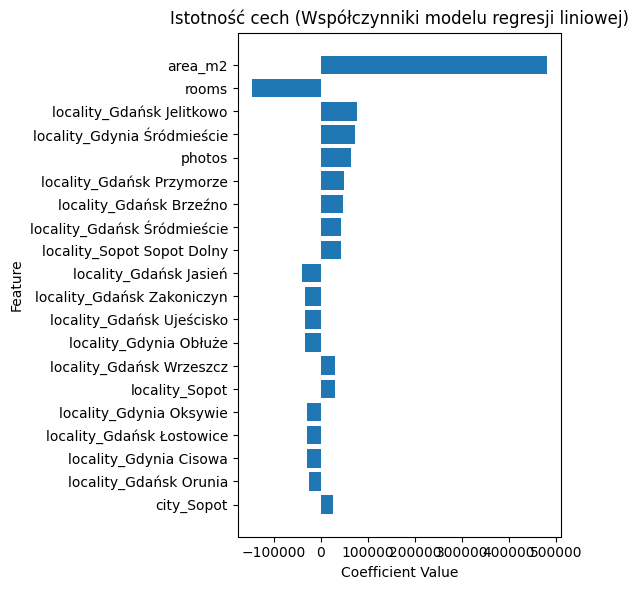

In [70]:
# Get the coefficients from the trained model
coefficients = model.coef_

# Get the feature names from the dummy DataFrame
feature_names = X_dummy.columns

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to show the most important features at the top
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=True).tail(20)  # Show top 20 features

# Create a bar plot of the coefficients
plt.figure(figsize=(6, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Istotność cech (Współczynniki modelu regresji liniowej)")
plt.tight_layout()
plt.show()

In [71]:
!pip install statsmodels

In [72]:
# To bardzo dziwne, ale liczba pokoi ma ujemny współczynnik. Sprawdzałam to na róne sposoby i nie widzę błędu w kodzie. Może to wynikać z korelacji między cechami (np. większe mieszkania mają zwykle więcej pokoi, ale cena za m2 może być niższa). Warto byłoby zbadać to dalej, np. poprzez analizę korelacji między cechami lub użycie innych modeli regresji. Policzę VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add a constant to the DataFrame for VIF calculation
X_with_constant = sm.add_constant(X_dummy)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i)
                  for i in range(X_with_constant.shape[1])]

# Display the VIF data
display(vif_data)

/Users/kasiak/priv/Development/Python/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/Users/kasiak/priv/Development/Python/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,feature,VIF
0,const,0.000000
1,area_m2,4.847994
2,rooms,4.546065
3,photos,1.239296
4,locality_Gdańsk,inf
...,...,...
86,city_Gdańsk,inf
87,city_Gdynia,inf
88,city_Sopot,inf
89,owner_direct_Bez pośredników,inf


In [73]:
# VIF jest poniej 5, co nie wskazuje na współliniowość. Zdaje się, e tak wychodzi, e wielkość mieszkania działa in plus na cenę, a liczba pokoi relatywnie obnia cenę mieszkania w danym metrau.

In [74]:
# Chcę zobaczyć, jak model przewiduje cenę dla konkretnego ogłoszenia
X_tested_flat = [[47, 'Gdynia Orłowo', 3, 'Bez pośredników', 16.0, 'Gdynia']]
X_tested_df = pd.DataFrame(X_tested_flat, columns=['area_m2', 'locality', 'rooms', 'owner_direct', 'photos', 'city'])

# Apply pd.get_dummies to the new data, aligning columns with X_dummy
X_tested_dummy = pd.get_dummies(X_tested_df, columns=['locality', 'city', 'owner_direct']).astype(float) # Wcześniej dałam taką właśnie kolejność kolumn# Ensure the columns of X_tested_dummy match the columns of X_dummy used for training
# Add missing columns with a value of 0.0
missing_cols = set(X_dummy.columns) - set(X_tested_dummy.columns)
for c in missing_cols:
    X_tested_dummy[c] = 0.0

# Ensure the order of columns is the same
X_tested_dummy = X_tested_dummy[X_dummy.columns]

X_tested_standard = scaler.transform(X_tested_dummy)
# Make predictions using the already trained model
predicted_price = model.predict(X_tested_standard)

print(f"Predicted price: {predicted_price[0]:,.2f} zł")

Predicted price: 781,114.39 zł


In [75]:
# Cena wydaje się być rozsądna.

In [76]:
import joblib

# Zapis skalera do pliku
joblib.dump(scaler, "scaler_trojmiasto.pkl")
print("Scaler zapisany jako scaler_trojmiasto.pkl")

Scaler zapisany jako scaler_trojmiasto.pkl


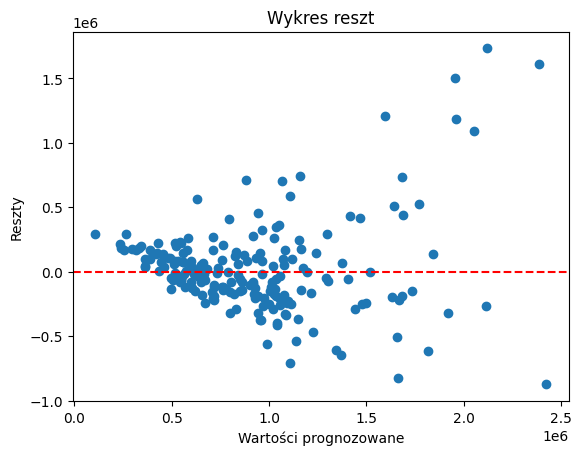

In [77]:
# Obliczam reszty
residuals = y_test - y_pred

# Tworzenie wykresu reszt
plt.scatter(y_pred, residuals)
plt.xlabel("Wartości prognozowane")
plt.ylabel("Reszty")
plt.title("Wykres reszt")
plt.axhline(y=0, color='r', linestyle='--')  # Dodanie poziomej linii na y=0
plt.show()

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Obliczenie miar
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.0f} zł")

R²: 0.638
MAE: 236091 zł


In [79]:
# Model ma dość dobre R². MAE na poziomie 236 tys. zł z kolei jest ju dość duze. W zestawieniu z wykresem reszt widać, ze model całkiem nieźle radzi sobie z małymi mieszkaniami, ale wraz ze wzrostem ceny mieszkania myli się coraz bardziej (heteroskedastyczność). Mozna rozwazyć transformację zmiennej przewidywanej na logarytm, usunięcie outlier'ów lub użycie bardziej zaawansowanego modelu regresji.

In [80]:
# === Zapis modelu ===
joblib.dump(model, "model_regresji_liniowej_trojmiasto.pkl")
print("✅ Model zapisano jako 'model_regresji_liniowej_trojmiasto.pkl'")

✅ Model zapisano jako 'model_regresji_liniowej_trojmiasto.pkl'


In [81]:
joblib.dump(TRAIN_COLUMNS, "train_columns.joblib")

NameError: name 'TRAIN_COLUMNS' is not defined